# Yelp Business Analysis

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
business = pd.read_csv('yelp_business.csv')
user = pd.read_csv('yelp_user.csv')

In [4]:
attr = pd.read_csv('yelp_business_attributes.csv')
hours = pd.read_csv('yelp_business_hours.csv')
checkin = pd.read_csv('yelp_checkin.csv')
tip = pd.read_csv('yelp_tip.csv')

In [5]:
business.columns

Index([u'business_id', u'name', u'neighborhood', u'address', u'city', u'state',
       u'postal_code', u'latitude', u'longitude', u'stars', u'review_count',
       u'is_open', u'categories'],
      dtype='object')

In [6]:
user.columns

Index([u'user_id', u'name', u'review_count', u'yelping_since', u'friends',
       u'useful', u'funny', u'cool', u'fans', u'elite', u'average_stars',
       u'compliment_hot', u'compliment_more', u'compliment_profile',
       u'compliment_cute', u'compliment_list', u'compliment_note',
       u'compliment_plain', u'compliment_cool', u'compliment_funny',
       u'compliment_writer', u'compliment_photos'],
      dtype='object')

In [7]:
attr.columns

Index([u'business_id', u'AcceptsInsurance', u'ByAppointmentOnly',
       u'BusinessAcceptsCreditCards', u'BusinessParking_garage',
       u'BusinessParking_street', u'BusinessParking_validated',
       u'BusinessParking_lot', u'BusinessParking_valet',
       u'HairSpecializesIn_coloring', u'HairSpecializesIn_africanamerican',
       u'HairSpecializesIn_curly', u'HairSpecializesIn_perms',
       u'HairSpecializesIn_kids', u'HairSpecializesIn_extensions',
       u'HairSpecializesIn_asian', u'HairSpecializesIn_straightperms',
       u'RestaurantsPriceRange2', u'GoodForKids', u'WheelchairAccessible',
       u'BikeParking', u'Alcohol', u'HasTV', u'NoiseLevel',
       u'RestaurantsAttire', u'Music_dj', u'Music_background_music',
       u'Music_no_music', u'Music_karaoke', u'Music_live', u'Music_video',
       u'Music_jukebox', u'Ambience_romantic', u'Ambience_intimate',
       u'Ambience_classy', u'Ambience_hipster', u'Ambience_divey',
       u'Ambience_touristy', u'Ambience_trendy', u'Ambie

In [8]:
attr.rename(columns = {'DietaryRestrictions_dairy-free':'DietaryRestrictions_dairyfree','DietaryRestrictions_gluten-free':'DietaryRestrictions_glutenfree','DietaryRestrictions_soy-free':'DietaryRestrictions_soyfree'}, inplace = True)

In [9]:
attr.columns

Index([u'business_id', u'AcceptsInsurance', u'ByAppointmentOnly',
       u'BusinessAcceptsCreditCards', u'BusinessParking_garage',
       u'BusinessParking_street', u'BusinessParking_validated',
       u'BusinessParking_lot', u'BusinessParking_valet',
       u'HairSpecializesIn_coloring', u'HairSpecializesIn_africanamerican',
       u'HairSpecializesIn_curly', u'HairSpecializesIn_perms',
       u'HairSpecializesIn_kids', u'HairSpecializesIn_extensions',
       u'HairSpecializesIn_asian', u'HairSpecializesIn_straightperms',
       u'RestaurantsPriceRange2', u'GoodForKids', u'WheelchairAccessible',
       u'BikeParking', u'Alcohol', u'HasTV', u'NoiseLevel',
       u'RestaurantsAttire', u'Music_dj', u'Music_background_music',
       u'Music_no_music', u'Music_karaoke', u'Music_live', u'Music_video',
       u'Music_jukebox', u'Ambience_romantic', u'Ambience_intimate',
       u'Ambience_classy', u'Ambience_hipster', u'Ambience_divey',
       u'Ambience_touristy', u'Ambience_trendy', u'Ambie

In [10]:
hours.columns

Index([u'business_id', u'monday', u'tuesday', u'wednesday', u'thursday',
       u'friday', u'saturday', u'sunday'],
      dtype='object')

In [11]:
checkin.columns

Index([u'business_id', u'weekday', u'hour', u'checkins'], dtype='object')

In [12]:
tip.columns

Index([u'text', u'date', u'likes', u'business_id', u'user_id'], dtype='object')

# 1. Sanity check

Check for missing values in any of the columns

In [13]:
business['is_open'].value_counts()

1    146702
0     27865
Name: is_open, dtype: int64

In [14]:
(146702*1.0)/174567

0.8403764743622792

In [15]:
business.isnull().values.any()

True

In [16]:
business.isnull().sum()    #It is seen that the neighborhood and pincode columns have missing values

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [17]:
#Since atleast 61% of neighborhood is null and so we decide to drop this column.
del business['neighborhood']

In [18]:
business['postal_code']=business['postal_code'].fillna(0) #The na values have been filled with zero

In [19]:
business_dropped=business.dropna(axis=0)

In [20]:
business_dropped.isnull().sum()
business_dropped.columns

Index([u'business_id', u'name', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'stars', u'review_count', u'is_open',
       u'categories'],
      dtype='object')

# 2. Exploratory Data Analysis

In [21]:
# Let's take only US data.

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
business_clean = business_dropped.loc[business_dropped['state'].isin(states)]

C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Text(0.5,1,'No. of Businesses/category')

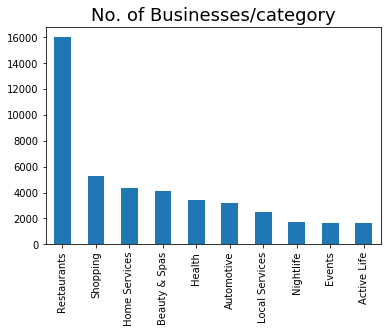

In [22]:
#Categories

business_clean[business_clean.categories.str.contains('Restaurants')]['categories']='Restaurants'
business_clean['categories']=business_clean.categories.str.split(';',expand=True)[0]
business_clean['categories']=business_clean.categories.replace(['Pizza','Food'],'Restaurants')
business_clean['categories']=business_clean.categories.replace('Event Planning & Services','Events')
business_clean['categories']=business_clean.categories.replace('Health & Medical','Health')
business_clean['categories'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('No. of Businesses/category',size=18)

In [24]:
#Check if business_id is unique column

business_clean[business_clean.groupby('business_id')['business_id'].transform('size')>1]
#So there are no duplicate values in business id which makes it the unique identifier.

Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, categories]
Index: []

In [25]:
business_clean['categories'].value_counts().sum()
(16014*1.0)/128302

0.12481488986921482

# Locations with businesses

In [26]:
business_clean['city'].value_counts()[:10]  

Las Vegas     26774
Phoenix       17213
Charlotte      8553
Scottsdale     8228
Pittsburgh     6355
Mesa           5760
Henderson      4465
Tempe          4263
Chandler       3994
Cleveland      3322
Name: city, dtype: int64

Text(0.5,1,'Top 10 locations of Yelp businesses')

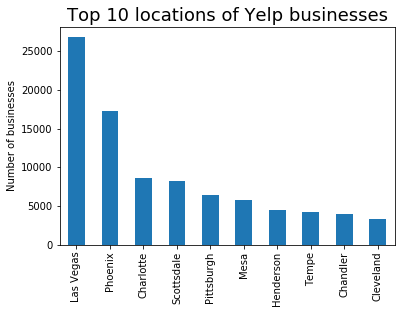

In [28]:
#plot the top 10 cities with highest businesses
business_clean['city'].value_counts()[:10].plot(kind='bar')
plt.ylabel('Number of businesses')
#plt.xlabel('Location of businesses')
plt.title('Top 10 locations of Yelp businesses',size=18,color='black')

In [29]:
#Proportion of the top 10 cities with business
(1.0*business_clean['city'].value_counts()[:10].sum())/business_clean['city'].value_counts().sum()

0.6931068884350985

Text(0.5,1,'Bottom 10 locations of Yelp businesses')

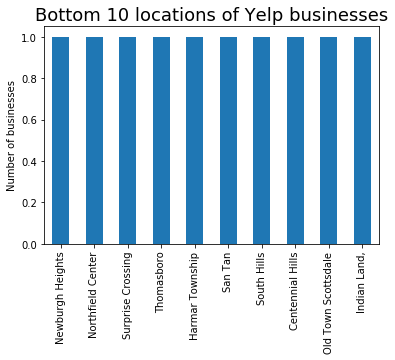

In [31]:
#plot the bottom 10 cities with low number of businesses
bottom_business=business_clean['city'].value_counts().sort_values(ascending=True)[:10].plot(kind='bar')
plt.ylabel('Number of businesses')
#plt.xlabel('Location of businesses')
plt.title('Bottom 10 locations of Yelp businesses',size=18,color='black')

# Review-generating locations

Text(0.5,1,'Top 10 review generating locations')

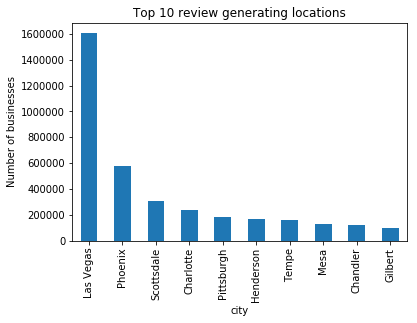

In [32]:
#Cities with the most review_count Per business
top_reviews=business_clean.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
top_reviews.plot(kind='bar')
plt.ylabel('Number of businesses')
#plt.xlabel('Locations with high reviews')
plt.title('Top 10 review generating locations')
#We see common misspellings in the city, correct it.

Correct city names

In [33]:
def merge_cities(s):
    
    # Create a map of misspellings to correct spelling
    misspellings = {'Ahwahtukee':'Ahwatukee',
                    'Ahwatukee Foothills Village':'Ahwatukee',
                    '110 Las Vegas':'las vegas'}
    
    if s in misspellings:
        return misspellings[s]
    else:
        return s

# Test it
print('Ahwahtukee mapped to', merge_cities('Ahwahtukee'))

('Ahwahtukee mapped to', 'Ahwatukee')


In [34]:
# Apply the function to the Series
business_clean['city'] = business_clean['city'].map(merge_cities)

# Check that it worked
mask = (business_clean['city'] == 'Ahwahtukee')
business_clean['city'][mask]
#Worked because it returns an empty series for this.

C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Series([], Name: city, dtype: object)

Text(0.5,1,'Bottom 10 review generating locations')

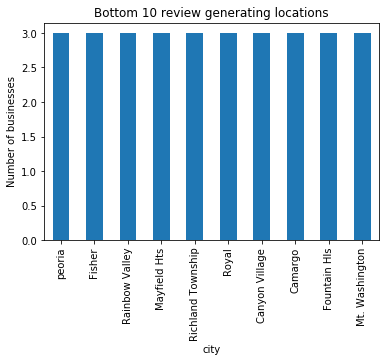

In [35]:
#Cities with the least review_count

bottom_reviews=business_clean.groupby('city')['review_count'].sum().sort_values(ascending=True)[:10]
bottom_reviews.plot(kind='bar')
plt.ylabel('Number of businesses')
#plt.xlabel('Locations with high reviews')
plt.title('Bottom 10 review generating locations')

In [36]:
#See if the top and bottom cities on number of restaurants also have most or least reviews
business_clean_crdf=pd.DataFrame({'review_count':business_clean.groupby('city')['review_count'].sum(),'average_stars':business_clean.groupby('city')['stars'].mean(),'total_count':business_clean.groupby('city')['city'].count()},index=business_clean['city'].drop_duplicates().sort_values())
business_clean_crdf['ratio']=(1.0*business_clean_crdf['review_count'])/business_clean_crdf['total_count']
business_clean_sorted=business_clean_crdf.sort_values(by='total_count',ascending=False)
business_clean_sorted[:10].sort_values(by='ratio',ascending=False)

average_stars  review_count  total_count      ratio
city                                                           
Las Vegas        3.709905       1604161        26774  59.914880
Tempe            3.729885        162772         4263  38.182501
Scottsdale       3.948529        308529         8228  37.497448
Henderson        3.789362        166884         4465  37.376036
Phoenix          3.673793        576709        17213  33.504270
Chandler         3.753380        122343         3994  30.631698
Pittsburgh       3.629819        179471         6355  28.240913
Cleveland        3.589103         92280         3322  27.778447
Charlotte        3.571554        237115         8553  27.723021
Mesa             3.636024        130883         5760  22.722743

Vegas has highest ratio of review_counts to business_count. This aligns with the fact that Vegas is the city with the most tourists in US. Yelp is more likely to be used by tourists to discover locations in new cities.

# Top locations with high stars

Text(0.5,1,'Top 10 locations with high stars')

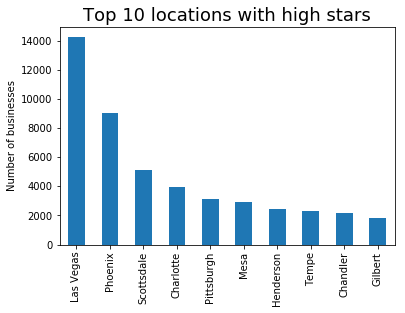

In [40]:
#cities with businesses with stars greater than 3.6

bus=business_clean[business_clean['stars']>3.5]
bus[['business_id','city','stars','review_count']]

cities_good_star=bus['city'].value_counts()
cities_good_star[:10].plot(kind='bar')

plt.ylabel('Number of businesses')
#plt.xlabel('Location of businesses')
plt.title('Top 10 locations with high stars',size=18,color='black')

In [37]:
cities_good_star[:10]

Las Vegas     14215
Phoenix        9000
Scottsdale     5102
Charlotte      3983
Pittsburgh     3097
Mesa           2915
Henderson      2465
Tempe          2277
Chandler       2166
Gilbert        1810
Name: city, dtype: int64

In [38]:
top_reviews[:10]

city
Las Vegas     1604161
Phoenix        576709
Scottsdale     308529
Charlotte      237115
Pittsburgh     179471
Henderson      166884
Tempe          162772
Mesa           130883
Chandler       122343
Gilbert         97204
Name: review_count, dtype: int64

In [39]:
business_clean['stars'].mean()

3.673683964396502

# Distribution of stars and review_counts:

While the stars distribution is neither balanced nor very skewed, the review_counts is highly skewed. This was done to understand if mean/median should be as threshold for segementing the businesses based on these features.

Text(0.5,1,'Distribution of stars')

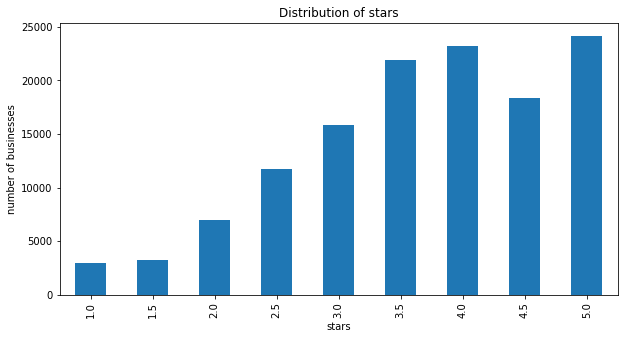

In [40]:
business_clean.groupby('stars')['stars'].agg('count').plot(kind='bar')
xlabel('stars')
ylabel('number of businesses')
title('Distribution of stars')
#skewed towards end3

In [41]:
business_clean['stars'].median()

4.0

Text(0.5,1,'Distribution of review_count')

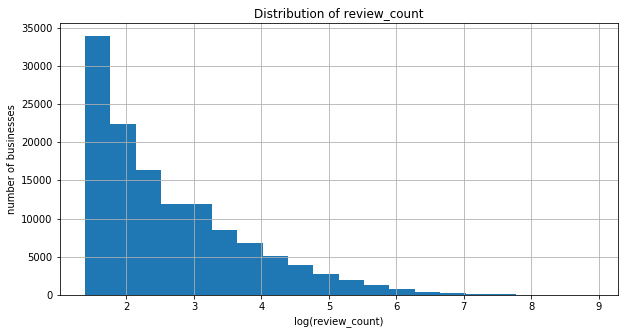

In [43]:
#What if we take log?
business_clean['review_count'].apply(np.log1p).hist(bins=20)
xlabel('log(review_count)')
ylabel('number of businesses')
title('Distribution of review_count')
#This gives us a much better understanding

In [41]:
business_clean['review_count'].median()
#highly skewed

9.0

# Segmenting the businesses based on Review_count and stars

Review_count and stars essentially translates to footfall and customer service. A huge value of review_count can be interpreted as increased footfall for the business as footfall is a driver for reviews. Similarly, star rating can be taken as a substitute for customer service as a highly satisfied customer would most likely give a high star for the business.

We group the businesses into four segments.

1. Going great - These are businesses with high review_counts and high star ratings

2. Increase footfall - These are businesses with high star ratings, but low review_counts, which means they need to focus on increasing footfall

3. God Save them - These are businesses with low footfall and not so good customer ratings also

4. Improve service - These businesses have high footfall, but lower ratings. So, focusing on customer service would help them.

Groups 2 and 3 would need to work on their action items to avoid falling into group3.


What we expected to see was more businesses being closed down in groups 3 and 4 and more businesses being open in groups 1 and 2. That is exactly what we observed in the plot as well.

In [42]:
business_clean.loc[(business_clean['review_count']>=8) & (business_clean['stars']>=3.5),'category']="Going great"
business_clean.loc[(business_clean['review_count']>=8) & (business_clean['stars']<3.5),'category']="Improve service"
business_clean.loc[(business_clean['review_count']<8) & (business_clean['stars']<3.5),'category']="God save them"
business_clean.loc[(business_clean['review_count']<8) & (business_clean['stars']>=3.5),'category']="Increase footfall"
business_clean

C:\Users\aadia\Anaconda2\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aadia\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


business_id  \
0       FYWN1wneV18bWNgQjJ2GNg   
1       He-G7vWjzVUysIKrfNbPUQ   
2       KQPW8lFf1y5BT2MxiSZ3QA   
3       8DShNS-LuFqpEWIp0HxijA   
4       PfOCPjBrlQAnz__NXj9h_w   
6       kCoE3jvEtg6UVz5SOD3GVw   
7       OD2hnuuTJI9uotcKycxg1A   
8       EsMcGiZaQuG1OOvL9iUFug   
9       TGWhGNusxyMaA4kQVBNeew   
10      XOSRcvtaKc_Q5H1SAzN20A   
11      Y0eMNa5C-YU1RQOZf9XvVA   
13      NmZtoE3v8RdSJEczYbMT9g   
14      fNMVV_ZX7CJSDWQGdOM8Nw   
16      IQSlT5jGE6CCDhSG0zG3xg   
17      b2I2DXtZVnpUMCXp1JON7A   
18      0FMKDOU8TJT1x87OKYGDTg   
21      94KziT6DQ9XlBET3WzIv_w   
22      7YIy1tXOor9VCwvaSjuBHg   
26      VBHEsoXQb2AQ76J9l8h1uQ   
28      Dj0S-Oe4ytRJzMGUPgYUkw   
29      gAy4LYpsScrj8POnCW6btQ   
31      zzMu-6SmqhpvHxVRM6tx9g   
34      7gquCdaFoHZCcLYDttpHtw   
35      8y56fOiKhtCnqaiYB2S2Qg   
36      ok38fApaT1TBEU-IH85BvA   
37      lj0MiK5_fyv9df2twnsI7g   
38      S4a42azhoOmr0fpeNkggHg   
39      A_Ij4SwFmlRbVtRnsdSzWA   
40      tRVx2c89coruPRwYhGTcTw   
41      1Jp_hmPNUZArNqzpbm7B0g   
...                        ...   
174521  aR--vz6A2FMGMTIpwyWiJA   
174522  7wQXbUU2Mwvivg9wmBlrkg   
174523  nkDSE-yhvLX4ij5fSzvb5Q   
174525  Fbn3idu4uKvWVx3jGWDpnw   
174526  wEGVBX6dg-htABZPg3Eabw   
174528  PCj1wDpVyb6y_h0RulVaHg   
174530  WGOBgUeuRrrnRp5R5SMKAQ   
174532  Ls_nR1MEcsOw5KuTlh0dfQ   
174533  6AGvafGH6q6x5yQnHIQwHQ   
174534  qbMN30jySx1-qShrymti8w   
174538  axvE68Q_osdFijj1a21Omw   
174539  swjz4q8gI79Ndg4APuHEUA   
174540  g0uFTFdKGarWEPb9gHlmag   
174541  PfSNuUa53A-N5rY1kRshmA   
174542  BhcpdT3W7YeyFeVAWPolkQ   
174545  pUhU5ohYv65g8B47dTXAKA   
174546  sH9WsMj8sNTTSAUWv4UEEg   
174547  OMXqIZdvhDlrXlkpR34diQ   
174550  R2oTFgwyurdx8fmZh7uAGg   
174551  6jzWUo0HAT3hNgBH-zHtYg   
174552  9ouC6BpmjFpLfHeQnLQqng   
174553  JnhuORtEQOW8XkVXB3l2tQ   
174554  vewqpBniDWKH4R05hxQwUQ   
174556  n9a-3YhibkMDUEgncIivHg   
174558  UdEmYOnk2iJDY9lpEPAlJQ   
174559  N-ujj4Xsq7Qg9A1fDGkUmA   
174563  gRGalHVu6BcaUDIAGVW_xQ   
174564  XXvZBIHoJBU5d6-a-oyMWQ   
174565  lNpPGgM96nPIYM1shxciHg   
174566  viKaP26BcHU6cLx8sf4gKg   

                                                     name  \
0                                      "Dental by Design"   
1                                   "Stephen Szabo Salon"   
2                                 "Western Motor Vehicle"   
3                                      "Sports Authority"   
4                              "Brick House Tavern + Tap"   
6                                            "BDJ Realty"   
7                                           "Soccer Zone"   
8                                      "Any Given Sundae"   
9                                 "Detailing Gone Mobile"   
10                                    "East Coast Coffee"   
11                               "CubeSmart Self Storage"   
13                                 "Complete Dental Care"   
14                           "Showmars Government Center"   
16                                       "T & Y Nail Spa"   
17                              "Meineke Car Care Center"   
18                                 "Senior's Barber Shop"   
21                                                  "Fye"   
22      "TSA Checkpoint T-4 A - Phoenix Sky Harbor Int...   
26                                    "Alfredo's Jewelry"   
28                                         "Panera Bread"   
29                                           "Toast Cafe"   
31                               "Good Brakes Automotive"   
34                                         "Bubbly Nails"   
35                                       "Brewster's Pub"   
36                              "Kool Pool Care & Repair"   
37                  "Pampered Hair Passionate about Hair"   
38                                            "By Design"   
39                                   "Ciao Baby Catering"   
40                                                 "Yuzu"   
41                                        "Task Electric"   
...                

In [43]:
business_clean['category'].value_counts()

Going great          50414
Increase footfall    37198
Improve service      21619
God save them        19071
Name: category, dtype: int64

In [44]:
category_sum=business_clean.groupby(['category','is_open'])['business_id'].count().unstack()
category_sum

is_open               0      1
category                      
God save them      3444  15627
Going great        6993  43421
Improve service    3678  17941
Increase footfall  5855  31343

In [45]:
attr.isna().values.any()
#There are no null values in the business attribute dataframe.

True

In [46]:
business_attr_merged=business_clean.merge(attr,left_on="business_id",right_on="business_id")
business_attr_merged

business_id                                     name  \
0       FYWN1wneV18bWNgQjJ2GNg                       "Dental by Design"   
1       He-G7vWjzVUysIKrfNbPUQ                    "Stephen Szabo Salon"   
2       8DShNS-LuFqpEWIp0HxijA                       "Sports Authority"   
3       PfOCPjBrlQAnz__NXj9h_w               "Brick House Tavern + Tap"   
4       kCoE3jvEtg6UVz5SOD3GVw                             "BDJ Realty"   
5       OD2hnuuTJI9uotcKycxg1A                            "Soccer Zone"   
6       EsMcGiZaQuG1OOvL9iUFug                       "Any Given Sundae"   
7       TGWhGNusxyMaA4kQVBNeew                  "Detailing Gone Mobile"   
8       XOSRcvtaKc_Q5H1SAzN20A                      "East Coast Coffee"   
9       Y0eMNa5C-YU1RQOZf9XvVA                 "CubeSmart Self Storage"   
10      NmZtoE3v8RdSJEczYbMT9g                   "Complete Dental Care"   
11      fNMVV_ZX7CJSDWQGdOM8Nw             "Showmars Government Center"   
12      IQSlT5jGE6CCDhSG0zG3xg                         "T & Y Nail Spa"   
13      b2I2DXtZVnpUMCXp1JON7A                "Meineke Car Care Center"   
14      0FMKDOU8TJT1x87OKYGDTg                   "Senior's Barber Shop"   
15      94KziT6DQ9XlBET3WzIv_w                                    "Fye"   
16      VBHEsoXQb2AQ76J9l8h1uQ                      "Alfredo's Jewelry"   
17      Dj0S-Oe4ytRJzMGUPgYUkw                           "Panera Bread"   
18      gAy4LYpsScrj8POnCW6btQ                             "Toast Cafe"   
19      zzMu-6SmqhpvHxVRM6tx9g                 "Good Brakes Automotive"   
20      7gquCdaFoHZCcLYDttpHtw                           "Bubbly Nails"   
21      8y56fOiKhtCnqaiYB2S2Qg                         "Brewster's Pub"   
22      ok38fApaT1TBEU-IH85BvA                "Kool Pool Care & Repair"   
23      lj0MiK5_fyv9df2twnsI7g    "Pampered Hair Passionate about Hair"   
24      A_Ij4SwFmlRbVtRnsdSzWA                     "Ciao Baby Catering"   
25      tRVx2c89coruPRwYhGTcTw                                   "Yuzu"   
26      1Jp_hmPNUZArNqzpbm7B0g                          "Task Electric"   
27      zjySmTfL9WiMDVgp8-Jp3w                                   "TCBY"   
28      5qpi5VQ_S2Itm8xvRm1k8Q                         "Olsen Firearms"   
29      BnuzcebyB1AfxH0kjNWqSg               "Carrabba's Italian Grill"   
...                        ...                                      ...   
109770  OmSXZK0wHE8JY-0vg84P3A                    "Esther's Aesthetics"   
109771  CslboLl_NXJDf5Hj3YsDyg          "Carlone's Candy and Ice Cream"   
109772  Gr-2oBg4XyduSKbvnE-i9g       "Salt & Lime Modern Mexican Grill"   
109773  7wQXbUU2Mwvivg9wmBlrkg                        "Brown Bag Delis"   
109774  nkDSE-yhvLX4ij5fSzvb5Q                      "Tonic Bar & Grill"   
109775  Fbn3idu4uKvWVx3jGWDpnw  "Kristeen Ann, Clinical Hypnotherapist"   
109776  wEGVBX6dg-htABZPg3Eabw                  "Champagne Salon & Spa"   
109777  PCj1wDpVyb6y_h0RulVaHg               "Crest Premier Properties"   
109778  WGOBgUeuRrrnRp5R5SMKAQ                          "Perfect Patio"   
109779  Ls_nR1MEcsOw5KuTlh0dfQ                    "Cole's Public House"   
109780  6AGvafGH6q6x5yQnHIQwHQ                       "In Or Out Movers"   
109781  qbMN30jySx1-qShrymti8w                     "Davinci Landscapes"   
109782  axvE68Q_osdFijj1a21Omw                         "Flair Cleaners"   
109783  swjz4q8gI79Ndg4APuHEUA         "Stonegate Real Estate Services"   
109784  g0uFTFdKGarWEPb9gHlmag          "Tanner Materials Tile & Stone"   
109785  BhcpdT3W7YeyFeVAWPolkQ                   "Goodyear Endodontics"   
109786  pUhU5ohYv65g8B47dTXAKA                              "Starbucks"   
109787  sH9WsMj8sNTTSAUWv4UEEg                           "Sprint Store"   
109788  R2oTFgwyurdx8fmZh7uAGg                              "Hot Topic"   
109789  6jzWUo0HAT3hNgBH-zHtYg                                 "Target"   
109790  9ouC6BpmjFpLfHeQnLQqng                   "9 Dragons Fight Shop"   
109791  JnhuORtEQOW8XkVXB3l2tQ              

Look deeper into these segments

In [47]:
b1=business_attr_merged[business_attr_merged['category'] == 'Going great']
b2=business_attr_merged[business_attr_merged['category'] == 'Increase footfall']
b3=business_attr_merged[business_attr_merged['category'] == 'God save them']
b4=business_attr_merged[business_attr_merged['category'] == 'Improve service']

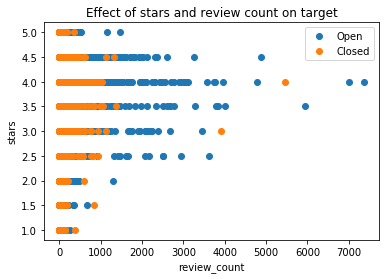

In [48]:
#To see if our grouping of category on the businesses correct?

c4 = business_attr_merged[business_attr_merged['is_open'] == 1]
c6 = business_attr_merged[business_attr_merged['is_open'] == 0]

plot(c4['review_count'], c4['stars'], marker='o', linestyle='None', label='Open')
plot(c6['review_count'], c6['stars'], marker='o', linestyle='None', label='Closed')
xlabel('review_count')
ylabel('stars')
plt.title('Effect of stars and review count on target')
legend(numpoints=1, loc='best')
show()

# Business categories

We looked at business categories and their open/close status by the segments created by us. The significance is that customers might be looking for specific attributes when they visit businesses and the absence of it can have an adverse effect.Analyzed our top category restaurants - looked at parking garage, accept credit cards?, dogs allowed, alcohol available

*Parking garage and alcohol have a positive correlation while having a valet parking, allowing dogs and being open for 24 hours did not have any significant effect on the target

In [50]:
business_attr_merged.groupby(['category','is_open','Alcohol'])['Alcohol'].count().unstack()

Alcohol                    FALSE     Na  TRUE
category          is_open                    
God save them     0           70   2590   104
                  1          510   9735   777
Going great       0           50   6429   178
                  1          455  38073  1656
Improve service   0           29   3370    72
                  1          370  15341   782
Increase footfall 0           77   4599   219
                  1          637  22061  1616

In [52]:
business_attr_merged.groupby(['category','is_open','BusinessAcceptsCreditCards'])['BusinessAcceptsCreditCards'].count().unstack()

BusinessAcceptsCreditCards  FALSE     Na  TRUE
category          is_open                     
God save them     0           176   2441   147
                  1          1321   8570  1131
Going great       0           273   6181   203
                  1          3409  33734  3041
Improve service   0           139   3232   100
                  1          1708  13957   828
Increase footfall 0           357   4115   423
                  1          2806  17996  3512

In [53]:
business_attr_merged.groupby(['category','is_open','BusinessParking_valet'])['BusinessParking_valet'].count().unstack()

BusinessParking_valet      FALSE     Na  TRUE
category          is_open                    
God save them     0          663   1942   159
                  1         1171   9720   131
Going great       0         1218   3511  1928
                  1         4199  30197  5788
Improve service   0          674   1823   974
                  1         2726  11749  2018
Increase footfall 0          905   3686   304
                  1         1324  22739   251

In [56]:
business_attr_merged.groupby(['category','is_open','WheelchairAccessible'])['WheelchairAccessible'].count().unstack()

WheelchairAccessible     FALSE     Na  TRUE
category        is_open                    
God save        0          120   2345   299
                1          170  10194   658
Going great     0          182   5413  1062
                1          399  36068  3717
Loyal customers 0          135   4209   551
                1          241  22824  1249
Need to improve 0          102   2802   567
                1          244  14542  1707

In [57]:
business_attr_merged.groupby(['category','is_open','BikeParking'])['BikeParking'].count().unstack()

BikeParking              FALSE     Na   TRUE
category        is_open                     
God save        0           54   2074    636
                1          122   9988    912
Going great     0          167   3618   2872
                1          992  26379  12813
Loyal customers 0          108   3550   1237
                1          433  20468   3413
Need to improve 0           81   2115   1275
                1          279  13104   3110

Let us interpret the Na in the set as follows : True means the business has this feature and is operational;
                                              : Na means not sure of the feature status
                                              : False means they never had this feature.
                                              Na was intentionally not imputed as it would affect the analysis in this case.

In [54]:
business_categories=business_attr_merged.groupby(['categories','is_open','category'])['business_id'].count().unstack(-1).fillna(0)
business_categories[:5]

category                   God save them  Going great  Improve service  \
categories        is_open                                                
3D Printing       1                  0.0          1.0              0.0   
ATV Rentals/Tours 1                  0.0          2.0              0.0   
Acai Bowls        0                  0.0          0.0              0.0   
                  1                  1.0          5.0              0.0   
Accessories       0                  8.0         12.0              2.0   

category                   Increase footfall  
categories        is_open                     
3D Printing       1                      1.0  
ATV Rentals/Tours 1                      3.0  
Acai Bowls        0                      1.0  
                  1                      1.0  
Accessories       0                     33.0

In [56]:
business_categories['Total']=business_categories['God save them']+business_categories['Going great']+business_categories['Improve service']+business_categories['Increase footfall']

In [57]:
business_categories.sort_values(by='Total',ascending=False)[:20]

category                God save them  Going great  Improve service  \
categories     is_open                                                
Restaurants    1               1194.0       5640.0           2912.0   
               0                620.0       1874.0            990.0   
Shopping       1                724.0       1369.0            636.0   
Home Services  1                609.0       1110.0            539.0   
Beauty & Spas  1                337.0       1571.0            412.0   
Health         1                466.0        895.0            405.0   
Automotive     1                319.0        913.0            367.0   
Local Services 1                313.0        705.0            243.0   
Active Life    1                 87.0        620.0            114.0   
Events         1                116.0        595.0            242.0   
Fast Food      1                232.0        239.0            633.0   
Nightlife      1                 89.0        648.0            257.0   
Hair Salons    1                115.0        512.0             59.0   
Doctors        1                212.0        257.0            235.0   
Nail Salons    1                109.0        473.0            220.0   
Real Estate    1                248.0        165.0            251.0   
Auto Repair    1                 70.0        423.0            155.0   
Bars           1                 53.0        568.0            214.0   
Sandwiches     1                147.0        424.0            223.0   
Mexican        1                 45.0        492.0            270.0   

category                Increase footfall    Total  
categories     is_open                              
Restaurants    1                   1298.0  11044.0  
               0                    936.0   4420.0  
Shopping       1                   1364.0   4093.0  
Home Services  1                   1217.0   3475.0  
Beauty & Spas  1                   1024.0   3344.0  
Health         1                   1144.0   2910.0  
Automotive     1                    638.0   2237.0  
Local Services 1                    744.0   2005.0  
Active Life    1                    510.0   1331.0  
Events         1                    349.0   1302.0  
Fast Food      1                     88.0   1192.0  
Nightlife      1                    158.0   1152.0  
Hair Salons    1                    438.0   1124.0  
Doctors        1                    317.0   1021.0  
Nail Salons    1                    162.0    964.0  
Real Estate    1                    300.0    964.0  
Auto Repair    1                    307.0    955.0  
Bars           1                    110.0    945.0  
Sandwiches     1                    108.0    902.0  
Mexican        1                     51.0    858.0

In [61]:
#These are the top categories in terms of business count. So intuitively, let us see what features make sense.
attr.columns

Index([u'business_id', u'AcceptsInsurance', u'ByAppointmentOnly',
       u'BusinessAcceptsCreditCards', u'BusinessParking_garage',
       u'BusinessParking_street', u'BusinessParking_validated',
       u'BusinessParking_lot', u'BusinessParking_valet',
       u'HairSpecializesIn_coloring', u'HairSpecializesIn_africanamerican',
       u'HairSpecializesIn_curly', u'HairSpecializesIn_perms',
       u'HairSpecializesIn_kids', u'HairSpecializesIn_extensions',
       u'HairSpecializesIn_asian', u'HairSpecializesIn_straightperms',
       u'RestaurantsPriceRange2', u'GoodForKids', u'WheelchairAccessible',
       u'BikeParking', u'Alcohol', u'HasTV', u'NoiseLevel',
       u'RestaurantsAttire', u'Music_dj', u'Music_background_music',
       u'Music_no_music', u'Music_karaoke', u'Music_live', u'Music_video',
       u'Music_jukebox', u'Ambience_romantic', u'Ambience_intimate',
       u'Ambience_classy', u'Ambience_hipster', u'Ambience_divey',
       u'Ambience_touristy', u'Ambience_trendy', u'Ambie

Text(0.5,1,'Effect of accepting credit cards on target')

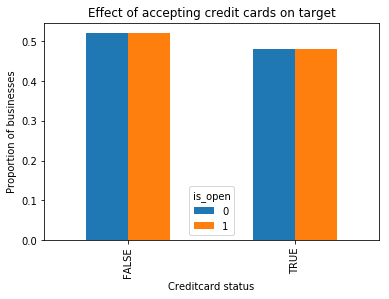

In [58]:
value=business_attr_merged[business_attr_merged['BusinessAcceptsCreditCards']=='Na'].index
cc_na_dropped=business_attr_merged.drop(value)

cc_vs_open = pd.crosstab(cc_na_dropped['BusinessAcceptsCreditCards'], cc_na_dropped['is_open'])
total_cc = cc_vs_open.apply(sum)
cc_vs_open = cc_vs_open/total_cc
cc_vs_open.plot(kind='bar')
xlabel('Creditcard status')
ylabel('Proportion of businesses')
plt.title('Effect of accepting credit cards on target')

#Not very correlated to target - open

Text(0.5,1,'Effect of garage on target')

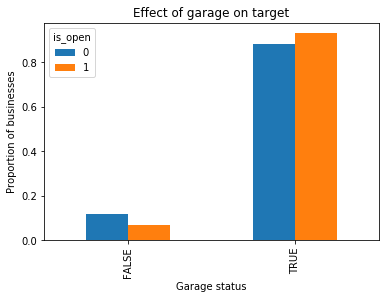

In [107]:
# Delete these row indexes from dataFrame


value=business_attr_merged[business_attr_merged['BusinessParking_garage']=='Na'].index
garage_na_dropped=business_attr_merged.drop(value)
#business_attr_merged['BusinessParking_garage']

garage_vs_open = pd.crosstab(garage_na_dropped['BusinessParking_garage'], garage_na_dropped['is_open'])
total_garage = garage_vs_open.apply(sum)
garage_vs_open = garage_vs_open/total_garage
garage_vs_open.plot(kind='bar')
xlabel('Garage status')
ylabel('Proportion of businesses')
plt.title('Effect of garage on target')

#Bringing this back, will help the business stay open longer.
#Positive correlation

Text(0.5,1,'Effect of alcohol on target')

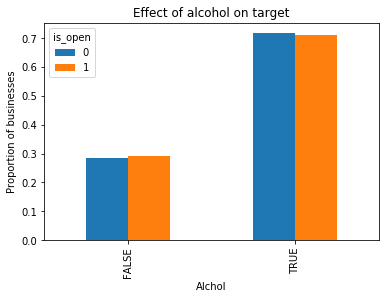

In [63]:
value=business_attr_merged[business_attr_merged['Alcohol']=='Na'].index
alcohol_na_dropped=business_attr_merged.drop(value)
alcohol_vs_open = pd.crosstab(alcohol_na_dropped['Alcohol'], alcohol_na_dropped['is_open'])
total_alcohol = alcohol_vs_open.apply(sum)
alcohol_vs_open = alcohol_vs_open/total_alcohol
alcohol_vs_open.plot(kind='bar')
xlabel('Alchol')
ylabel('Proportion of businesses')
plt.title('Effect of alcohol on target')

#More open with it. POsitive correlation

Text(0.5,1,'Effect of allowing dogs on target')

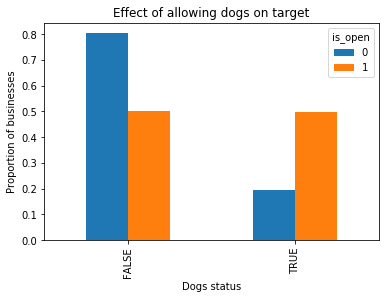

In [64]:
value=business_attr_merged[business_attr_merged['DogsAllowed']=='Na'].index
dogs_na_dropped=business_attr_merged.drop(value)
#business_attr_merged['BusinessParking_garage']

dogs_vs_open = pd.crosstab(dogs_na_dropped['DogsAllowed'], dogs_na_dropped['is_open'])
total_dogs = dogs_vs_open.apply(sum)
dogs_vs_open = dogs_vs_open/total_dogs
dogs_vs_open.plot(kind='bar')
xlabel('Dogs status')
ylabel('Proportion of businesses')
plt.title('Effect of allowing dogs on target')

#No effect

# 3. Modelling

We will try to predict the attributes that lead to closure of businesses or successful operations of a business. This is to understand which business attributes do customers look for in a particular category of business and hence Yelp could target businesses with those attributes which would lead to long term relationship and revenue. We looked at the top two biggest categories of businesses in the dataset : Restaurants and Shopping to understand the kind of features affecting the operations of a business.

We tried to build Logistic Regression, KNN and Random forest models.

1.Top features of shopping malls are highly correlated than restaurants’ features. However, it also means that non-parametric models are better suited for predicting shopping mall success.

2.Yelp’s overall strategy shifting their focus away from local restaurants seems to be a step in the right direction, because it is harder to build long-lasting relationships with customers in an industry where business life cycles are shorter

3.Even though KNN works best for our data, it doesn’t give us information about the direction and magnitude of each feature, so we’ll explain variable importance with regression coefficients instead


In [65]:
new_attr=business_attr_merged[['category','categories','is_open','AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel',
       'RestaurantsAttire', 'Music_dj', 'Music_background_music',
       'Music_no_music', 'Music_karaoke', 'Music_live', 'Music_video',
       'Music_jukebox', 'Ambience_romantic', 'Ambience_intimate',
       'Ambience_classy', 'Ambience_hipster', 'Ambience_divey',
       'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale',
       'Ambience_casual', 'RestaurantsGoodForGroups', 'Caters', 'WiFi',
       'RestaurantsReservations', 'RestaurantsTakeOut', 'HappyHour',
       'GoodForDancing', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck',
       'Smoking', 'DriveThru', 'DogsAllowed', 'BusinessAcceptsBitcoin',
       'Open24Hours', 'BYOBCorkage', 'BYOB', 'Corkage',
       'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
        'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService']]
new_attr.shape

(109800, 81)

In [66]:
only_res=new_attr[new_attr['categories']=='Restaurants']
only_res.set_index(['category','categories'], inplace=True)
only_res.shape

(15464, 79)

Creating Target

In [101]:
only_res['target'] = 0.0
only_res['target'][only_res['is_open'] > 0] = 1.0  #positive class

column_names=only_res.columns.values
formula = 'target ~ 0 + {}'.format(' + '.join(['C(Q("{}"))'.format(column_names[i]) for i in range(1,79)]))

from patsy import dmatrices
Y, X = dmatrices(formula, only_res, return_type='dataframe')
y = Y['target'].values

C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Split the data into training and testing sets

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Fit the classifier

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [105]:
#Train accuracy
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.7208056171470806


Accuracy on test set

In [106]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.7239224137931034


Baseline = predict the most frequent class

In [75]:
# y_train is 0 or 1.
print 'Number of positive examples =', len(y_train[y_train==1])
print 'Number of negative examples =', len(y_train[y_train==0]) 

Number of positive examples = 7689
Number of negative examples = 3135


In [76]:
#Hence, baseline will be always predicting the positive class.

positive_examples_in_test = len(y_test[y_test==1])
total_examples_in_test = len(y_test)

print 'Number of examples where baseline is correct =', positive_examples_in_test
print 'Baseline accuracy =', positive_examples_in_test * 1.0 / total_examples_in_test

Number of examples where baseline is correct = 3355
Baseline accuracy = 0.723060344828


Feature weights

In [77]:
model.coef_

array([[ 3.63751714e-01, -1.84808576e+00,  2.10592801e-01,
         9.71957210e-02,  4.42842256e-01,  5.18900258e-02,
        -1.37241330e-01,  5.18900258e-02,  5.85265598e-02,
         5.18900258e-02,  1.61307966e-02,  5.18900258e-02,
        -2.51868097e-02,  5.18900258e-02,  2.91896463e-01,
        -1.74308088e-02, -2.87850286e-01,  3.92164238e-01,
         8.24634634e-01,  1.88507718e-01,  2.64361756e-01,
        -2.64225051e-02, -4.29262503e-01,  1.56272102e-01,
        -4.06855195e-01, -6.62143925e-01, -1.88712499e+00,
        -1.29332887e+00,  5.85366170e-01,  1.12306573e-01,
         4.33940311e-01, -2.67080614e-01,  5.04777610e-01,
         0.00000000e+00, -9.67233193e-01,  1.57213484e-01,
         1.57213484e-01,  1.57213484e-01,  1.57213484e-01,
         1.57213484e-01,  1.57213484e-01,  1.57213484e-01,
         1.57213484e-01,  1.57213484e-01,  1.98243162e-01,
        -1.24144968e-01, -1.65764942e-01,  4.17313692e-01,
        -7.06239532e-01, -9.02778640e-01, -5.42856501e-0

In [78]:
# And the model intercept
model.intercept_

array([0.36375171])

In [79]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()
weights2 = DataFrame(dict(weights = weights, weights_abs = weights.abs()))
weights2
weights2.sort_values(by='weights_abs',ascending=False)

weights  weights_abs
C(Q("BYOB"))[T.no]                             -2.047807     2.047807
C(Q("HasTV"))[T.full_bar]                      -1.887125     1.887125
C(Q("HappyHour"))[T.Na]                        -1.880690     1.880690
C(Q("BusinessAcceptsCreditCards"))[T.Na]       -1.848086     1.848086
C(Q("BYOB"))[T.yes_free]                       -1.731393     1.731393
C(Q("HasTV"))[T.none]                          -1.293329     1.293329
C(Q("RestaurantsDelivery"))[T.TRUE]            -1.284183     1.284183
C(Q("RestaurantsDelivery"))[T.Na]               1.086677     1.086677
C(Q("BYOB"))[T.yes_corkage]                    -1.024018     1.024018
C(Q("DogsAllowed"))[T.TRUE]                     1.005984     1.005984
C(Q("GoodForDancing"))[T.Na]                    0.970885     0.970885
C(Q("Music_dj"))[T.casual]                     -0.967233     0.967233
C(Q("DogsAllowed"))[T.Na]                      -0.925373     0.925373
C(Q("RestaurantsReservations"))[T.no]          -0.902779     0.902779
C(Q("GoodForKids"))[T.Na]                       0.824635     0.824635
C(Q("RestaurantsTakeOut"))[T.Na]                0.785462     0.785462
C(Q("RestaurantsTakeOut"))[T.TRUE]              0.768335     0.768335
C(Q("CoatCheck"))[T.TRUE]                       0.720079     0.720079
C(Q("RestaurantsReservations"))[T.free]        -0.706240     0.706240
C(Q("HappyHour"))[T.TRUE]                      -0.702590     0.702590
C(Q("GoodForMeal_latenight"))[T.TRUE]           0.665079     0.665079
C(Q("HasTV"))[T.beer_and_wine]                 -0.662144     0.662144
C(Q("DriveThru"))[T.no]                         0.650770     0.650770
C(Q("NoiseLevel"))[T.Na]                        0.585366     0.585366
C(Q("OutdoorSeating"))[T.TRUE]                 -0.562351     0.562351
C(Q("GoodForMeal_dinner"))[T.TRUE]              0.561011     0.561011
C(Q("RestaurantsReservations"))[T.paid]        -0.542857     0.542857
C(Q("DietaryRestrictions_kosher"))[T.TRUE]      0.541534     0.541534
C(Q("RestaurantsAttire"))[T.quiet]              0.504778     0.504778
C(Q("GoodForMeal_breakfast"))[T.TRUE]           0.479720     0.479720
...                                                  ...          ...
C(Q("RestaurantsTableService"))[T.Na]           0.075817     0.075817
C(Q("BusinessAcceptsBitcoin"))[T.Na]            0.060423     0.060423
C(Q("BusinessParking_validated"))[T.TRUE]       0.058527     0.058527
C(Q("BusinessParking_lot"))[T.Na]               0.051890     0.051890
C(Q("HairSpecializesIn_coloring"))[T.Na]        0.051890     0.051890
C(Q("BusinessParking_validated"))[T.Na]         0.051890     0.051890
C(Q("BusinessParking_valet"))[T.Na]             0.051890     0.051890
C(Q("BusinessParking_street"))[T.Na]            0.051890     0.051890
C(Q("BestNights_monday"))[T.Na]                 0.039210     0.039210
C(Q("BikeParking"))[T.Na]                      -0.026423     0.026423
C(Q("BusinessParking_valet"))[T.TRUE]          -0.025187     0.025187
C(Q("DietaryRestrictions_vegan"))[T.Na]        -0.025083     0.025083
C(Q("DietaryRestrictions_halal"))[T.Na]        -0.025083     0.025083
C(Q("DietaryRestrictions_vegetarian"))[T.Na]   -0.025083     0.025083
C(Q("AgesAllowed"))[T.Na]                      -0.025083     0.025083
C(Q("DietaryRestrictions_kosher"))[T.Na]       -0.025083     0.025083
C(Q("GoodForKids"))[T.2]                       -0.017431     0.017431
C(Q("BusinessParking_lot"))[T.TRUE]             0.016131     0.016131
C(Q("BestNights_thursday"))[T.TRUE]             0.013591     0.013591
C(Q("BestNights_tuesday"))[T.TRUE]              0.013591     0.013591
C(Q("Open24Hours"))[T.Na]                       0.011573     0.011573
C(Q("BestNights_monday"))[T.TRUE]               0.000736     0.000736
C(Q("CoatCheck"))[T.Na]                         0.000589     0.000589
C(Q("GoodForMeal_brunch"))[T.Na]                0.000589     0.000589
C(Q("GoodForMeal_breakfast"))[T.Na]             0.000589     0.000589
C(Q("GoodForMeal_dinner"))[T.Na]                0.000589   

b. KNN - for Restaurants category

In [80]:
from sklearn import neighbors
model_knn = neighbors.KNeighborsClassifier(n_neighbors=15,
                                           weights='uniform',
                                           p=2)

model_knn.fit(X_train, y_train)
model_knn.score(X_test,y_test)

from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3,7,11,15,19],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

gs = GridSearchCV(
    neighbors.KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=5,
    n_jobs=-1
)

gs_results = gs.fit(X_train, y_train)

gs_results.best_score_, gs_results.best_params_

prediction = gs_results.predict(X_test)
print metrics.accuracy_score(y_train, prediction_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished


0.7208056171470806


c. Random Forest - Restaurants category

In [81]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(X_train, y_train)

prediction = model_rf.predict(X_test)
print(metrics.accuracy_score(y_train, prediction_train))

grid_params = {
    'n_estimators': [3,5,7,9,10]
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    verbose=1,
    cv=5,
    n_jobs=-1
)

gs_results = gs.fit(X_train, y_train)

gs_results.best_score_, gs_results.best_params_

prediction = gs_results.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.7208056171470806
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.7224137931034482


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


Shopping Category

a. Logistic Regression : 
Trying it on shopping to compare the kind of difference in attributes importance for both the categories

In [82]:
only_shop=new_attr[new_attr['categories']=='Shopping']
only_shop.set_index(['category','categories'], inplace=True)
only_shop.shape

(4914, 79)

It is exactly the same columns as in only_res. So we are using those column names

In [83]:
only_shop['target'] = 0.0
only_shop['target'][only_shop['is_open'] > 0] = 1.0  #positive class
only_shop['target'].value_counts()

C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aadia\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.0    4093
0.0     821
Name: target, dtype: int64

In [84]:
formula_shop = 'target ~ 0 + {}'.format(' + '.join(['C(Q("{}"))'.format(column_names[i]) for i in range(1,79)]))
formula_shop

'target ~ 0 + C(Q("AcceptsInsurance")) + C(Q("ByAppointmentOnly")) + C(Q("BusinessAcceptsCreditCards")) + C(Q("BusinessParking_garage")) + C(Q("BusinessParking_street")) + C(Q("BusinessParking_validated")) + C(Q("BusinessParking_lot")) + C(Q("BusinessParking_valet")) + C(Q("HairSpecializesIn_coloring")) + C(Q("HairSpecializesIn_africanamerican")) + C(Q("HairSpecializesIn_curly")) + C(Q("HairSpecializesIn_perms")) + C(Q("HairSpecializesIn_kids")) + C(Q("HairSpecializesIn_extensions")) + C(Q("HairSpecializesIn_asian")) + C(Q("HairSpecializesIn_straightperms")) + C(Q("RestaurantsPriceRange2")) + C(Q("GoodForKids")) + C(Q("WheelchairAccessible")) + C(Q("BikeParking")) + C(Q("Alcohol")) + C(Q("HasTV")) + C(Q("NoiseLevel")) + C(Q("RestaurantsAttire")) + C(Q("Music_dj")) + C(Q("Music_background_music")) + C(Q("Music_no_music")) + C(Q("Music_karaoke")) + C(Q("Music_live")) + C(Q("Music_video")) + C(Q("Music_jukebox")) + C(Q("Ambience_romantic")) + C(Q("Ambience_intimate")) + C(Q("Ambience_clas

In [85]:
from patsy import dmatrices
Y, X = dmatrices(formula_shop, only_shop, return_type='dataframe')
y = Y['target'].values

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [88]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.8328002326257633


In [89]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.8338983050847457


In [90]:
# y_train is 0 or 1.
print 'Number of positive examples =', len(y_train[y_train==1])
print 'Number of negative examples =', len(y_train[y_train==0])

Number of positive examples = 2863
Number of negative examples = 576


In [91]:
#Hence, baseline will be always predicting the positive class.

positive_examples_in_test = len(y_test[y_test==1])
total_examples_in_test = len(y_test)

print 'Number of examples where baseline is correct =', positive_examples_in_test
print 'Baseline accuracy =', positive_examples_in_test * 1.0 / total_examples_in_test

Number of examples where baseline is correct = 1230
Baseline accuracy = 0.833898305085


In [92]:
model.coef_

array([[ 0.06112418, -0.14795136,  0.03042137,  0.71086614, -0.4768267 ,
        -0.23963456,  0.16468733, -0.10997918,  0.16468733, -0.24653585,
         0.16468733,  0.43243012,  0.16468733, -0.52453581,  0.16468733,
        -0.18136894,  0.27991387,  0.15682187, -0.4797724 ,  0.64969213,
        -0.14184109, -0.64150898,  0.51007141, -0.02970711, -0.23965144,
        -0.14870423,  0.        , -0.76839603,  0.        , -0.05161585,
         0.10734078,  0.20057787, -0.05161585, -1.20795454, -0.00151236,
         0.4215874 ,  0.82068455, -0.23681327,  0.20306709,  0.06112418,
         0.06112418,  0.06112418,  0.06112418,  0.        ,  0.06112418,
        -0.05161585, -0.29106726, -0.58456264,  0.53056093,  0.68029831]])

In [93]:
# And the model intercept
model.intercept_

array([0.06112418])

In [94]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights[weights.sort_values()>0].sort_values(ascending=False)

C(Q("RestaurantsDelivery"))[T.Na]             0.820685
C(Q("BusinessAcceptsCreditCards"))[T.TRUE]    0.710866
C(Q("BYOBCorkage"))[T.Na]                     0.680298
C(Q("GoodForKids"))[T.Na]                     0.649692
C(Q("Open24Hours"))[T.Na]                     0.530561
C(Q("BikeParking"))[T.Na]                     0.510071
C(Q("BusinessParking_lot"))[T.TRUE]           0.432430
C(Q("RestaurantsTableService"))[T.Na]         0.421587
C(Q("GoodForKids"))[T.2]                      0.279914
C(Q("BestNights_monday"))[T.TRUE]             0.203067
C(Q("RestaurantsReservations"))[T.no]         0.200578
C(Q("BusinessParking_lot"))[T.Na]             0.164687
C(Q("BusinessParking_street"))[T.Na]          0.164687
C(Q("BusinessParking_validated"))[T.Na]       0.164687
C(Q("HairSpecializesIn_coloring"))[T.Na]      0.164687
C(Q("BusinessParking_valet"))[T.Na]           0.164687
C(Q("GoodForKids"))[T.3]                      0.156822
C(Q("RestaurantsReservations"))[T.free]       0.107341
C(Q("CoatC

b. KNN

In [95]:
from sklearn import neighbors
model_knn = neighbors.KNeighborsClassifier(n_neighbors=15,
                                           weights='uniform',
                                           p=2)

model_knn.fit(X_train, y_train)
model_knn.score(X_test,y_test)

from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3,7,11,15,19],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

gs = GridSearchCV(
    neighbors.KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=5,
    n_jobs=-1
)

gs_results = gs.fit(X_train, y_train)

gs_results.best_score_, gs_results.best_params_



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.8s finished


(0.8330910148298925,
 {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'})

In [96]:
prediction = gs_results.predict(X_test)
print metrics.accuracy_score(y_train, prediction_train)

0.8328002326257633


c. Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, random_state=1)
model_rf.fit(X_train, y_train)

prediction = model_rf.predict(X_test)
print metrics.accuracy_score(y_train, prediction_train)

0.8328002326257633


In [98]:
grid_params = {
    'n_estimators': [3,5,7,9,10]
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    verbose=1,
    cv=5,
    n_jobs=-1
)

gs_results = gs.fit(X_train, y_train)

gs_results.best_score_, gs_results.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


(0.8296016283803431, {'n_estimators': 5})

In [99]:
prediction = gs_results.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.8345762711864407
